# Entrega: _Animula Vagula Blandula_

Hace ya más de treinta y cinco años, unos profesores de la Facultad de Químicas de la UCM aplicaron un tipo particular de algoritmos genéticos basados en el modelo de cuasiespecie {cite}`Eigen1971` para estudiar los procesos de evolución y selección en poblaciones de entidades auto replicativas {cite}`MoranMontero1984`. 

En un alarde metafórico, el trabajo ilustra como una población de moléculas autorreplicativas sometidas a un proceso de evolución y selección puede terminar por escribir en su genotipo maestro la frase __ANIMULA
VAGULA BLANDULA__ que se atribuye al emperador Adriano {cite}`Yourcenar1951` (existe una traducción de Julio Cortázar {cite}`Cortazar2009`. 

Nos planteamos en esta sección reproducir estos resultados utilizando un algoritmo genético cuyos pasos hemos definido en el primer apartado.

## Ejercicio 1. 

Utiliza los ejercicios resueltos en la primera sección para definir un bucle de replicación-selección para reproducir los resultados del artículo de `MoranMontero1984`.



### Importamos los módulos necesarios

In [1]:
import matplotlib.pyplot as plt
import pygad
import random
import numpy as np

### Definición de las variables del código

In [2]:
#Definimos un diccionario en el que se le asigna a cada letra un número
letter_to_number={letter:index for index, letter in enumerate('abcdefghijklmnopqrstuvwxyz')}
letter_to_number

{'a': 0,
 'b': 1,
 'c': 2,
 'd': 3,
 'e': 4,
 'f': 5,
 'g': 6,
 'h': 7,
 'i': 8,
 'j': 9,
 'k': 10,
 'l': 11,
 'm': 12,
 'n': 13,
 'o': 14,
 'p': 15,
 'q': 16,
 'r': 17,
 's': 18,
 't': 19,
 'u': 20,
 'v': 21,
 'w': 22,
 'x': 23,
 'y': 24,
 'z': 25}

In [3]:
#Definimos la cadena objetivo Animula Vagula Blandula
target_string = "animulavagulablandula"
#Convertimos la cadena en una lista
targ_string=list("animulavagulablandula")
#Convertimos los caracteres a de la cadena a números
targ_string_to_numbers=[]
for i in targ_string:
    targ_string_to_numbers.append(letter_to_number[i])
print(targ_string_to_numbers)

[0, 13, 8, 12, 20, 11, 0, 21, 0, 6, 20, 11, 0, 1, 11, 0, 13, 3, 20, 11, 0]


In [4]:
#Definimos los parámetros de PyGAD

population_size = 100 #tamaño de la población

mutation_rate = 10  #tasa de mutación

num_generation = 20  #número de generaciones

sol_per_pop=100  #número de soluciones

space=list(range(0,26))  #espacio en el que se puede introducir mutaciones (todas las letras del alfabeto que corresponden a 26 números)

### Definición de las funciones necesarias

In [5]:
#Función que genera una cadena aleatoria
def generate_random_string(length):
    """
    Esta función crea una cadena aleatoria de caracteres y la convierte a su forma númerica
    siendo esa la que hace falta para crear el algoritmo genético.
    length: longitud de la cadena aleatoria. Debe coincidir con la cadena  objetivo.
    
    """
    string=[random.choice('abcdefghijklmnopqrstuvwxyz') for _ in range(length)]
    string_to_numbers=[]
    for i in string:
        string_to_numbers.append(letter_to_number[i])
    return string_to_numbers
generate_random_string(21)

[25, 8, 23, 21, 14, 15, 5, 2, 23, 7, 23, 24, 12, 10, 2, 15, 25, 19, 11, 20, 6]

In [6]:
#Función que genera la población inicial a partir de la cuál se va a producir la evolución hacia la cadena objetivo
def initialize_population(size):
    """
    size: tamaño de la población.
    Genera una población de un determinado tamaño proporcionado.
    
    """
    matrix=[generate_random_string(len(target_string)) for i in range(size)]
    return matrix
#Se genera la población inicial
initial_pop=initialize_population(population_size)

In [7]:
#Función de fitness
def fitness_func(instance, solution, solution_idx):
    """
    instance: instancia del algoritmo genético.
    solution: cadena de la que se va a evaluar el fitness.
    
    Evalúa la similitud de una cadena obtenida en el algoritmo genético
    con la cadena objetivo Animula Vagula Blandula y devuelve un
    porcentaje de similitud.
    
    """
    score = sum(1 for a, b in zip(solution, targ_string_to_numbers) if a == b)
    fitness=score/len(target_string)*100
    return fitness

In [8]:
#Función que define el tipo de mutaciones
def mutation_func(offspring, instance):
    """
    offspring: cadena que se va a mutar
    instance: instancia del algoritmo genético
    
    Evalúa si un determinado gen de la cadena que se va a mutar
    coincide con el gen en la misma posición de la cadena objetivo.
    Si hay coincidencia, el gen no se muta. 
    Si no hay coincidencia, el gen se muta de manera aleatoria.
    
    """
    for chromosome_idx in range(offspring.shape[0]):
        for gene_idx in range(offspring.shape[1]):
            if offspring[chromosome_idx, gene_idx] != targ_string_to_numbers[gene_idx]:
                mutated_gene = random.choice(space)
                offspring[chromosome_idx, gene_idx] = mutated_gene
    return offspring

In [9]:
#Función que imprime las soluciones cada 4 generaciones
def on_generation(ga):
    if ga.generations_completed % 4==0:
        print("Generation", ga.generations_completed)
        print(ga.population)

### Definción del algoritmo genético

In [10]:
ga_instance = pygad.GA(num_generations=num_generation,
                       sol_per_pop=sol_per_pop,
                       num_genes=len(target_string),
                       initial_population=initial_pop,
                       num_parents_mating=2,
                       fitness_func=fitness_func,
                       gene_space = space, 
                       parent_selection_type="rank",
                       gene_type=int,
                       mutation_type=mutation_func,
                       mutation_percent_genes=mutation_rate,
                       on_generation=on_generation,
                       allow_duplicate_genes=True,
                       save_solutions=True)

C:\Users\Usuario\anaconda3\lib\site-packages\pygad\pygad.py:1083: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  if not self.suppress_warnings: warnings.warn("Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.")


In [11]:
ga_instance.run()

Generation 4
[[ 0 13 20 ... 20 11 19]
 [ 0 13 14 ... 20 11  0]
 [ 0  0 16 ... 20 11 11]
 ...
 [ 0 13  6 ... 20 11  0]
 [ 0  3 23 ... 20 11 12]
 [ 0 13 14 ... 20 11  0]]
Generation 8
[[ 0 13  8 ... 20 11  0]
 [ 0 13  8 ... 20 11  0]
 [ 0 13  8 ... 20 11  0]
 ...
 [ 0 13  8 ... 20 11  0]
 [ 0 13  8 ... 20 11  0]
 [ 0 13  8 ... 20 11  0]]
Generation 12
[[ 0 13  8 ... 20 11  0]
 [ 0 13  8 ... 20 11  0]
 [ 0 13  8 ... 20 11  0]
 ...
 [ 0 13  8 ... 20 11  0]
 [ 0 13  8 ... 20 11  0]
 [ 0 13  8 ... 20 11  0]]
Generation 16
[[ 0 13  8 ... 20 11  0]
 [ 0 13  8 ... 20 11  0]
 [ 0 13  8 ... 20 11  0]
 ...
 [ 0 13  8 ... 20 11  0]
 [ 0 13  8 ... 20 11  0]
 [ 0 13  8 ... 20 11  0]]
Generation 20
[[ 0 13  8 ... 20 11  0]
 [ 0 13  8 ... 20 11  0]
 [ 0 13  8 ... 20 11  0]
 ...
 [ 0 13  8 ... 20 11  0]
 [ 0 13  8 ... 20 11  0]
 [ 0 13  8 ... 20 11  0]]


In [12]:
#Obtenemos la mejor solución
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("best_solution: {solution}".format(solution =solution))

best_solution: [ 0 13  8 12 20 11  0 21  0  6 20 11  0  1 11  0 13  3 20 11  0]


In [13]:
#Comprobamos si la solcuión obtenida coincide con la solucón objetivo
solution_string=[]
for i in solution:
    for key, value in letter_to_number.items():
        if i == value:
            keys=key
            solution_string.append(keys)
print(''.join(solution_string))

animulavagulablandula


In [14]:
#Fitness de la solución
print("best_solution fitness: {} %".format(solution_fitness))

best_solution fitness: 100.0 %


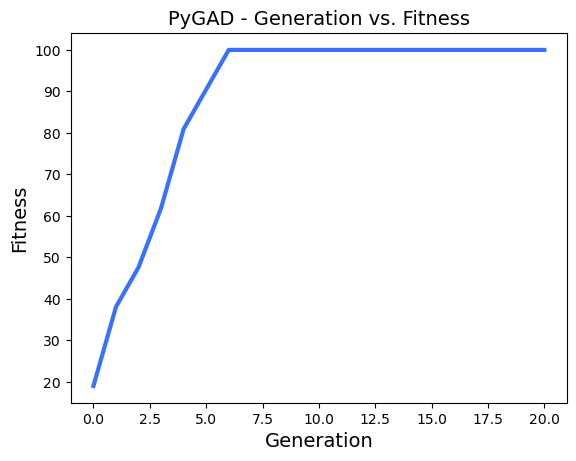

In [15]:
ga_instance.plot_fitness()
plt.close()